# Worksheet 1: Data Visualization


#### Submission:
Please **restart the kernel and run all**, then download a pdf file (file -> print preview -> save as pdf), and submit your worksheet (pdf version) to Gradescope. 

## Exercise 1

Please read the following documentation https://seaborn.pydata.org/generated/seaborn.histplot.html and try to add arguments `kde` and `element` to the following code. Then, explain the meaning of `kde` and `element`. 

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

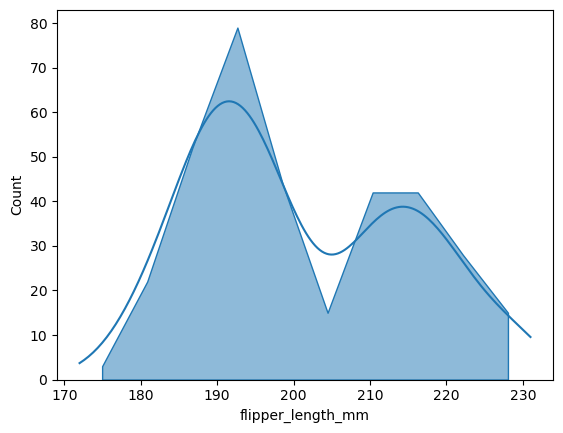

In [1]:
# load dataset
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm", element="poly", kde =True)

#kde uses a kernel density function to smooth the data and plot it as 1 or more lines.
#element allows us to change the visual representation of the histogram to better represent our data. 

## Exercise 2

Please read the following documentation https://seaborn.pydata.org/generated/seaborn.barplot.html and use code and words to explain argument `estimator`. 

<Axes: xlabel='species', ylabel='flipper_length_mm'>

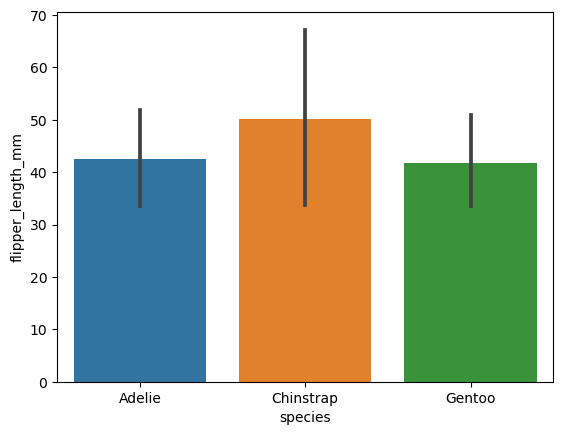

In [2]:
#estimator is a string or callable function that maps a vector to a scalar.
#This allows the user to specify what statistical function is used to aggregate data within a categorcal bins. 

sns.barplot(data=penguins, x="species", y="flipper_length_mm", estimator=np.var)

#here we use estimator to show the variance in the data, seen in the grey lines in each bar

## Exercise 3

Run the following cell to generate a dataframe

In [3]:
# please do NOT change this cell

import numpy as np
import pandas as pd

n = 10               # number of x's
m = 100              # number of random samples of each
x = np.arange(n)     
X = np.zeros([m,n])
for i in range(n):
    X[:,i] = np.random.normal(x[i], x[i]+0.2, size=(m,))
    
df = pd.DataFrame(X)

Given above dataframe, please do the following:

1. Compute mean $\mu$ for each column and then draw a line plot. The x-axis should be column index and the y-axis contains column mean.

2. Then, compute the standard deviation $\sigma$ for each column.

3. Use matplotlib `fill_between` command to draw a line plot with shaded region. The lower and upper bound is computed by $\mu-\frac{1.96\sigma}{\sqrt{n}}$ and $\mu+\frac{1.96\sigma}{\sqrt{n}}$ ($n$ is number of samples for each column), respectively. This constructs the 95% confidence interval for each column. 


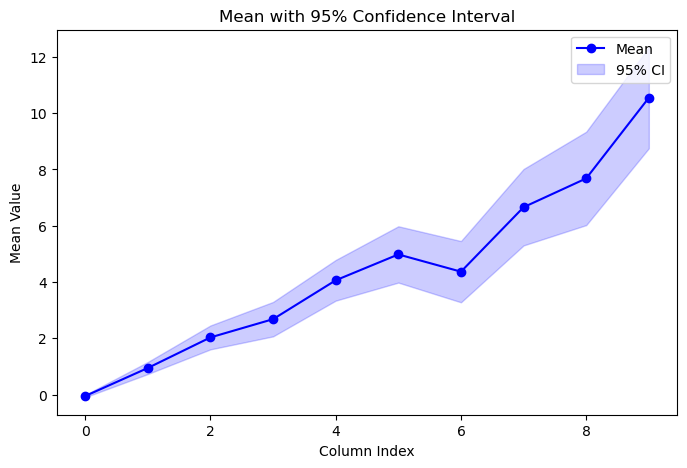

In [4]:

#Compute mean (μ) for each column
means = df.mean()

#Compute standard deviation (σ) for each column
std_devs = df.std()

# Step 3: Calculate the 95% confidence interval
n_samples = len(df)
# Note: We need to calculate the interval for each column
lower_bound = means - 1.96 * (std_devs / np.sqrt(n_samples))
upper_bound = means + 1.96 * (std_devs / np.sqrt(n_samples))

# Step 4: Plot the mean and confidence interval
plt.figure(figsize=(8, 5))

# Plot the mean
plt.plot(np.arange(n), means, label="Mean", color="blue", marker="o")

# Plot the 95% confidence interval as a shaded region
plt.fill_between(np.arange(n), lower_bound, upper_bound, color='blue', alpha=0.2, label="95% CI")

# Add labels and title
plt.xlabel("Column Index")
plt.ylabel("Mean Value")
plt.title("Mean with 95% Confidence Interval")
plt.legend()

# Show the plot
plt.show()